### Student Information
Name:楊仁瀚

Student ID:113062528

GitHub ID:113062528

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [532]:
### Begin Assignment Here

In [469]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the datasets and print to check if it works or not

In [470]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

X=df
wc=df

In [471]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [472]:
for t in df["comment"][:2]:
    print(t)



He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


### Check the amount of missing values in the dataframe

In [473]:

# TA's functions
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(df))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### Check the distribution of sentiment and print out

In [474]:
import matplotlib.pyplot as plt
%matplotlib inline

In [475]:
categories = ['nostalgia', 'not nostalgia']

In [476]:
print(df.sentiment.value_counts())

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

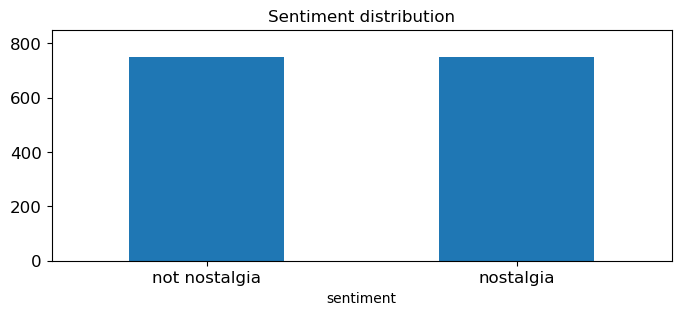

In [477]:
upper_bound = max(df.sentiment.value_counts()) + 100
plt.style.use('default')
# plot barchart for dataset
df.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Use NLTK to remove punkt and stopwords

In [478]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')


df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
df[0:5]["unigrams"]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\owen5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owen5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [singer, golden, voice, love, hear, time, grea...
1    [mist, beautiful, voice, ever, listened, kid, ...
2    [mr., reeves, songs, always, love, smooth, voi...
3    [30, day, leave, 1st, tour, viet, nam, convinc...
4    [listening, songs, reminds, mum, played, every...
Name: unigrams, dtype: object

In [479]:
df['comment'][13]

'I am 47 and grew up on songs of this type.  I am a Muslim. His songs some are a universal praise of the One and only God can be seen in many Places, and Jim Reeves praises our lord so well, and for sure my heart follow his words and its contents.'

### Count vectorizer

In [480]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['comment']) #learn the vocabulary and return document-term matrix
print(df_counts)

#analyze = count_vect.build_analyzer()
#analyze(df.comment[0])
df_counts.shape

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (1499, 2254)	2
  (1499, 1798)	1
  (1499, 3704)	2
  (1499, 1923)	1
  (1499, 3300)	3
  (1499, 3044)	2
  (1499, 1026)	1
  (1499, 2699)	1
  (1499, 3504)	1
  (1499, 1308)	1
  (1499, 208)	2
  (1499, 516)	1
  (1499, 637)	1
  (1499, 78)	1
  (1499, 1132)	1
  (1499, 863)	1
  (1499, 603)	2
  (1499, 3637)	1
  (1499, 1049)	1
  (1499, 87)	1
  (1499, 2027)	1
  (1499, 2089)	1
  (1499, 998)	1
  (1499, 3414)	1
  (1499, 2779)	1


(1500, 3730)

In [481]:
count_vect.get_feature_names_out()[0:10]
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [482]:
count_vect.get_feature_names_out()[df_counts[3, 0:100].nonzero()[1]]


array(['30', '1st', '2nd'], dtype=object)

### Use seaborn to product heatmap and make the sparse matrix dense


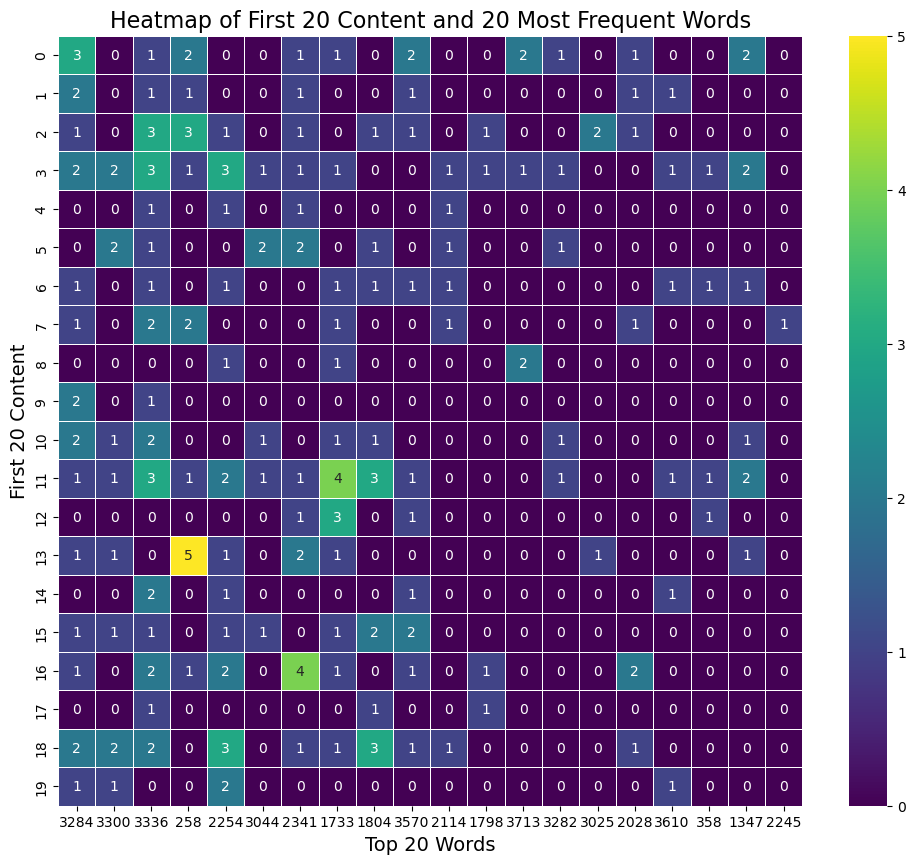

In [483]:
import seaborn as sns
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(df_counts)
dataf = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)

word_frequencies = dataf.sum(axis=0)
top_words = word_frequencies.nlargest(20).index
subset_df = dataf.iloc[:20, top_words]
top_words_names = dataf.columns[top_words].tolist()
dense_subset = subset_df.sparse.to_dense()



plt.figure(figsize=(12, 10))
sns.heatmap(dense_subset, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=.5)
plt.title('Heatmap of First 20 Content and 20 Most Frequent Words', fontsize=16)
plt.xlabel('Top 20 Words', fontsize=14)
plt.ylabel('First 20 Content', fontsize=14)



plt.show()

In [484]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [485]:
import numpy as np

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]


C:\Users\owen5\AppData\Local\Temp\ipykernel_21888\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



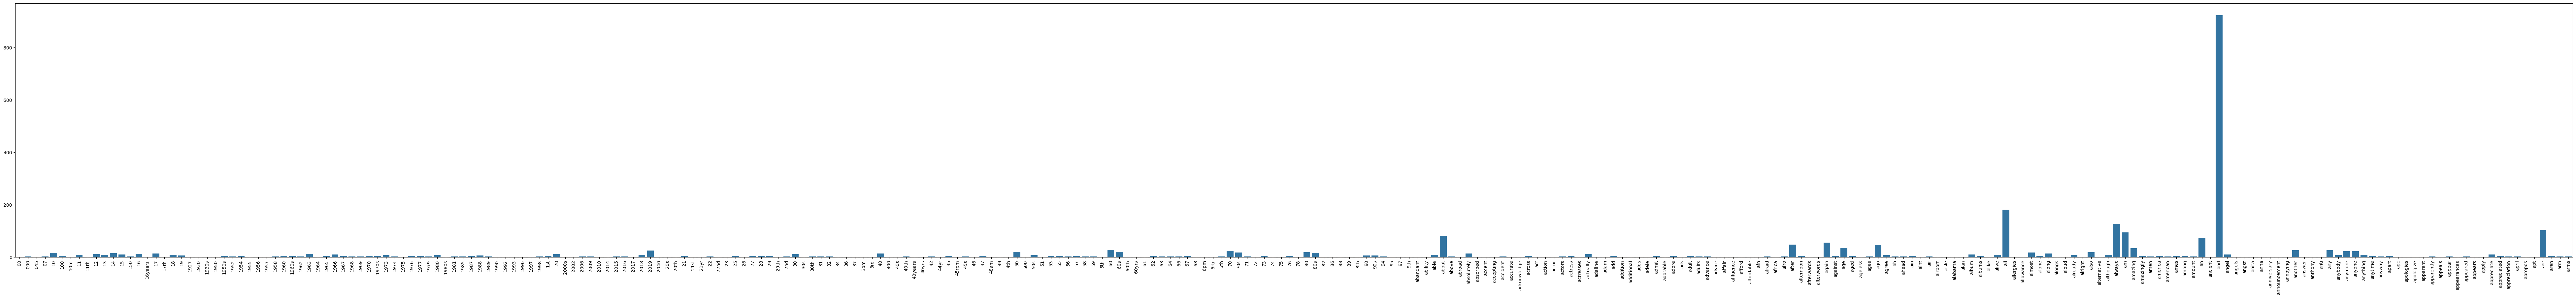

In [486]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Use Plotly for a nicer interactive visualization


In [487]:
import plotly.express as px
# Assuming term_frequencies and count_vect are defined as in your original code
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Prepare data for Plotly
data = {
    'terms': count_vect.get_feature_names_out()[:300],
    'frequencies': term_frequencies[:300]
}

# Create a DataFrame
import pandas as pd
dataf = pd.DataFrame(data)

# Create the bar plot using Plotly
fig = px.bar(dataf, x='terms', y='frequencies', 
             title='Term Frequencies', 
             labels={'terms': 'Terms', 'frequencies': 'Frequencies'},
             text='frequencies')

# Update layout for better readability
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Show the plot
fig.show()


In [488]:
# Answer here
# Calculate term frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Create a DataFrame
data = {
    'terms': count_vect.get_feature_names_out(),
    'frequencies': term_frequencies
}
dataf = pd.DataFrame(data)

# Sort DataFrame by frequencies and select top N
top_n = 20  # Change this number to visualize more/less
top_terms = dataf.nlargest(top_n, 'frequencies')

# Create the bar plot using Plotly
fig = px.bar(top_terms, x='terms', y='frequencies', 
             title=f'Top {top_n} Term Frequencies', 
             labels={'terms': 'Terms', 'frequencies': 'Frequencies'},
             text='frequencies')

# Update layout for better readability
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Show the plot
fig.show()

In [489]:
# Answer here
# Calculate term frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Create a DataFrame
data = {
    'terms': count_vect.get_feature_names_out(),
    'frequencies': term_frequencies
}
dataf = pd.DataFrame(data)

# Sort DataFrame by frequencies and select top N
top_n = 300  # Change this number to visualize more/less
top_terms = dataf.nlargest(top_n, 'frequencies')

# Create the bar plot using Plotly
fig = px.bar(top_terms, x='terms', y='frequencies', 
             title=f'Top {top_n} Term Frequencies', 
             labels={'terms': 'Terms', 'frequencies': 'Frequencies'},
             text='frequencies')

# Update layout for better readability
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Show the plot
fig.show()



In [490]:
# Answer here
# Calculate term frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Calculate logarithmic term frequencies
term_frequencies_log = np.log1p(term_frequencies)  # log1p is used to handle zero frequencies

# Create a DataFrame for both original and log frequencies
data = {
    'terms': count_vect.get_feature_names_out(),
    'frequencies': term_frequencies,
    'frequencies_log': term_frequencies_log
}
dataf = pd.DataFrame(data)

# Sort DataFrame by log frequencies and select top N
top_n = 300  # Change this number to visualize more/less
top_terms_log = dataf.nlargest(top_n, 'frequencies_log')

# Create the bar plot using Plotly for log frequencies
fig = px.bar(top_terms_log, x='terms', y='frequencies_log', 
             title=f'Top {top_n} Term Frequencies (Log Scale)', 
             labels={'terms': 'Terms', 'frequencies_log': 'Log Frequencies'},
             text='frequencies_log')

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Show the plot
fig.show()

### Use PAMI

In [491]:
df['comment']

0       He was a singer with a golden voice that I lov...
1       The mist beautiful voice ever I listened to hi...
2       I have most of Mr. Reeves songs.  Always love ...
3       30 day leave from 1st tour in Viet Nam to conv...
4       listening to his songs reminds me of my mum wh...
                              ...                        
1495    i don't know!..but the opening of the video,.....
1496    it's sad this is such a beautiful song when yo...
1497    Dear Friend, I think age and time is not that ...
1498    I was born in 1954 and started to be aware of ...
1499    This is the first CD I bought after my marriag...
Name: comment, Length: 1500, dtype: object

In [492]:
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [493]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


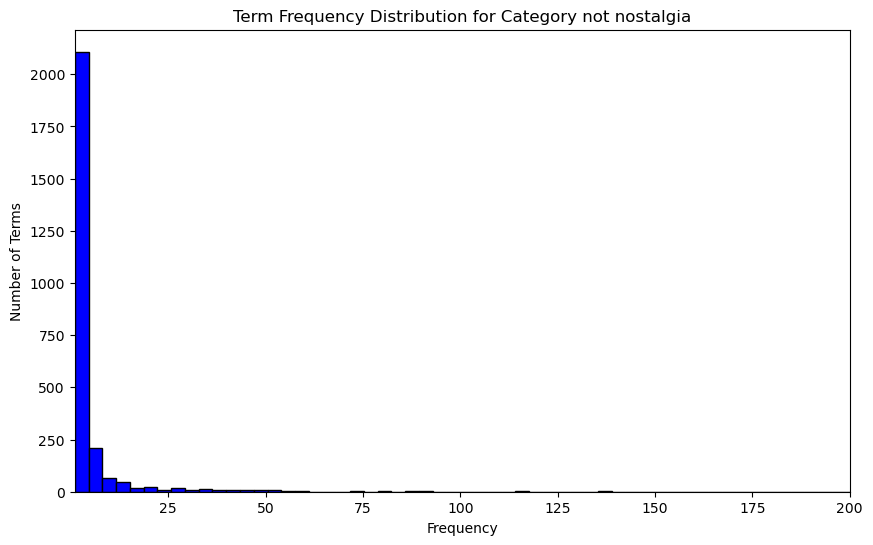

In [494]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=200, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [495]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

In [496]:
sorted_counts #We can see the frequencies sorted in a descending order


array([708, 453, 451, ...,   1,   1,   1], dtype=int64)

In [497]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0], dtype=int64)

In [498]:
filt_term_document_dfs[categories[category_number]].loc[:,'and'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

451

In [499]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [500]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [501]:

#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)



Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.45416989042229
Sparsity : 0.9965649449010148


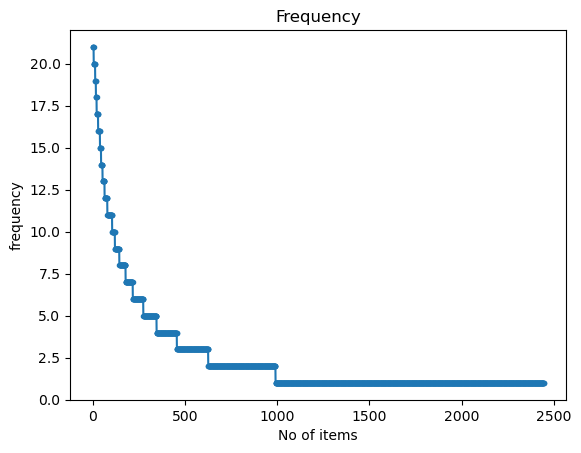

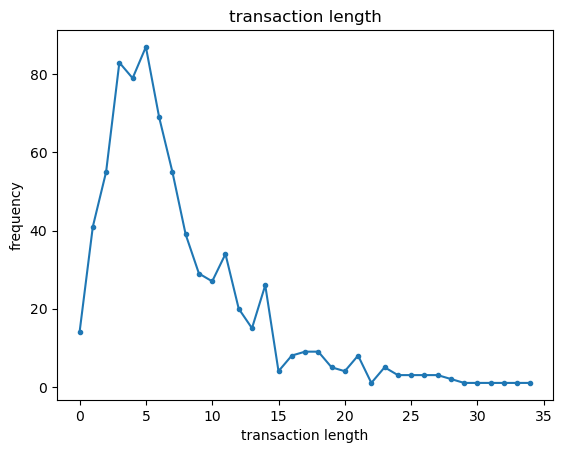

In [502]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


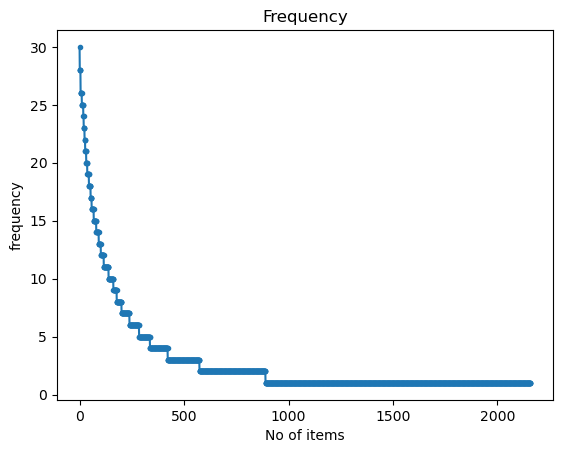

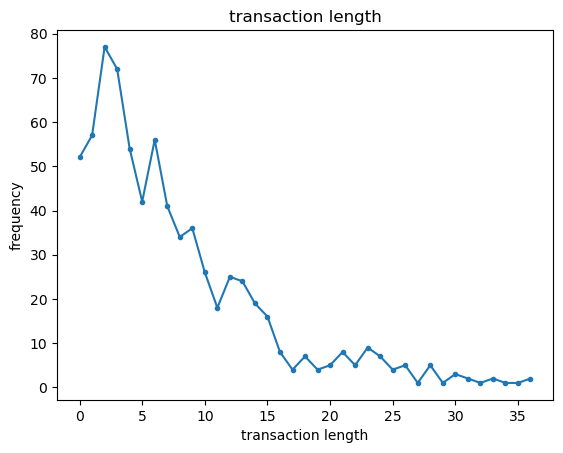

In [503]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### FPGROWTH with nostalgia and not nostalgia

In [504]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.0059888362884521484


In [505]:
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,elvis,21
140,every,21
141,loved,21
142,them,21


In [506]:
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.013989925384521484


In [507]:
obj2.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [508]:

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [509]:
final_pattern_df

,Patterns,Support
127,will,28
126,would,28
125,ever,28
123,or,26
120,kid,26
...,...,...
142,handsome,9
143,perfect,9
144,ll,9
145,happy,9


In [510]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### FAE TOP-K and MAXFPGROWTH

In [511]:
#Answer here
from PAMI.frequentPattern.topk import FAE  as alg

# Set the values for k
k_values = [100, 300, 500]
top_k_results = {}

for k in k_values:
    obj_top_k = alg.FAE(iFile='td_freq_db_not nostalgia.csv', k=k)  
    obj_top_k.mine()
    
    # Get the patterns and runtime
    patterns_top_k = obj_top_k.getPatternsAsDataFrame()
    runtime_top_k = obj_top_k.getRuntime()
    
    top_k_results[k] = {
        'patterns': patterns_top_k,
        'runtime': runtime_top_k
    }
    
    # Display results
    print(f'K={k} | Total No of Patterns: {len(patterns_top_k)} | Runtime: {runtime_top_k}')
"""
TopK frequent patterns were successfully generated using FAE algorithm.
K=100 | Total No of Patterns: 100 | Runtime: 0.006999969482421875
 TopK frequent patterns were successfully generated using FAE algorithm.
K=300 | Total No of Patterns: 300 | Runtime: 0.019081830978393555
 TopK frequent patterns were successfully generated using FAE algorithm.
K=500 | Total No of Patterns: 500 | Runtime: 0.039519309997558594
"""




from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm


# Set minimum support thresholds
minSup_values = [3, 6, 9]
max_fpgrowth_results = {}

for minSup in minSup_values:
    obj_max_fpgrowth = alg.MaxFPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
    obj_max_fpgrowth.mine()
    
    # Get the patterns and runtime
    patterns_max_fpgrowth = obj_max_fpgrowth.getPatternsAsDataFrame()
    runtime_max_fpgrowth = obj_max_fpgrowth.getRuntime()
    
    max_fpgrowth_results[minSup] = {
        'patterns': patterns_max_fpgrowth,
        'runtime': runtime_max_fpgrowth
    }
    
    # Display results
    print(f'Min Support={minSup} | Total No of Patterns: {len(patterns_max_fpgrowth)} | Runtime: {runtime_max_fpgrowth}')

"""
Min Support=3 | Total No of Patterns: 592 | Runtime: 0.2896301746368408
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Min Support=6 | Total No of Patterns: 271 | Runtime: 0.009998559951782227
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Min Support=9 | Total No of Patterns: 144 | Runtime: 0.006998538970947266
"""


 TopK frequent patterns were successfully generated using FAE algorithm.
K=100 | Total No of Patterns: 100 | Runtime: 0.006998300552368164
 TopK frequent patterns were successfully generated using FAE algorithm.
K=300 | Total No of Patterns: 300 | Runtime: 0.018316268920898438
 TopK frequent patterns were successfully generated using FAE algorithm.
K=500 | Total No of Patterns: 500 | Runtime: 0.04698348045349121
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Min Support=3 | Total No of Patterns: 592 | Runtime: 0.015997648239135742
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Min Support=6 | Total No of Patterns: 271 | Runtime: 0.008481264114379883
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Min Support=9 | Total No of Patterns: 144 | Runtime: 0.00599980354309082


'\nMin Support=3 | Total No of Patterns: 592 | Runtime: 0.2896301746368408\nMaximal Frequent patterns were generated successfully using MaxFp-Growth algorithm \nMin Support=6 | Total No of Patterns: 271 | Runtime: 0.009998559951782227\nMaximal Frequent patterns were generated successfully using MaxFp-Growth algorithm \nMin Support=9 | Total No of Patterns: 144 | Runtime: 0.006998538970947266\n'

### TSNE reduce dimension to 3d

In [512]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)


X_tsne_tdm.shape


(1500, 2)

In [513]:
X_tsne_aug.shape

(1500, 2)

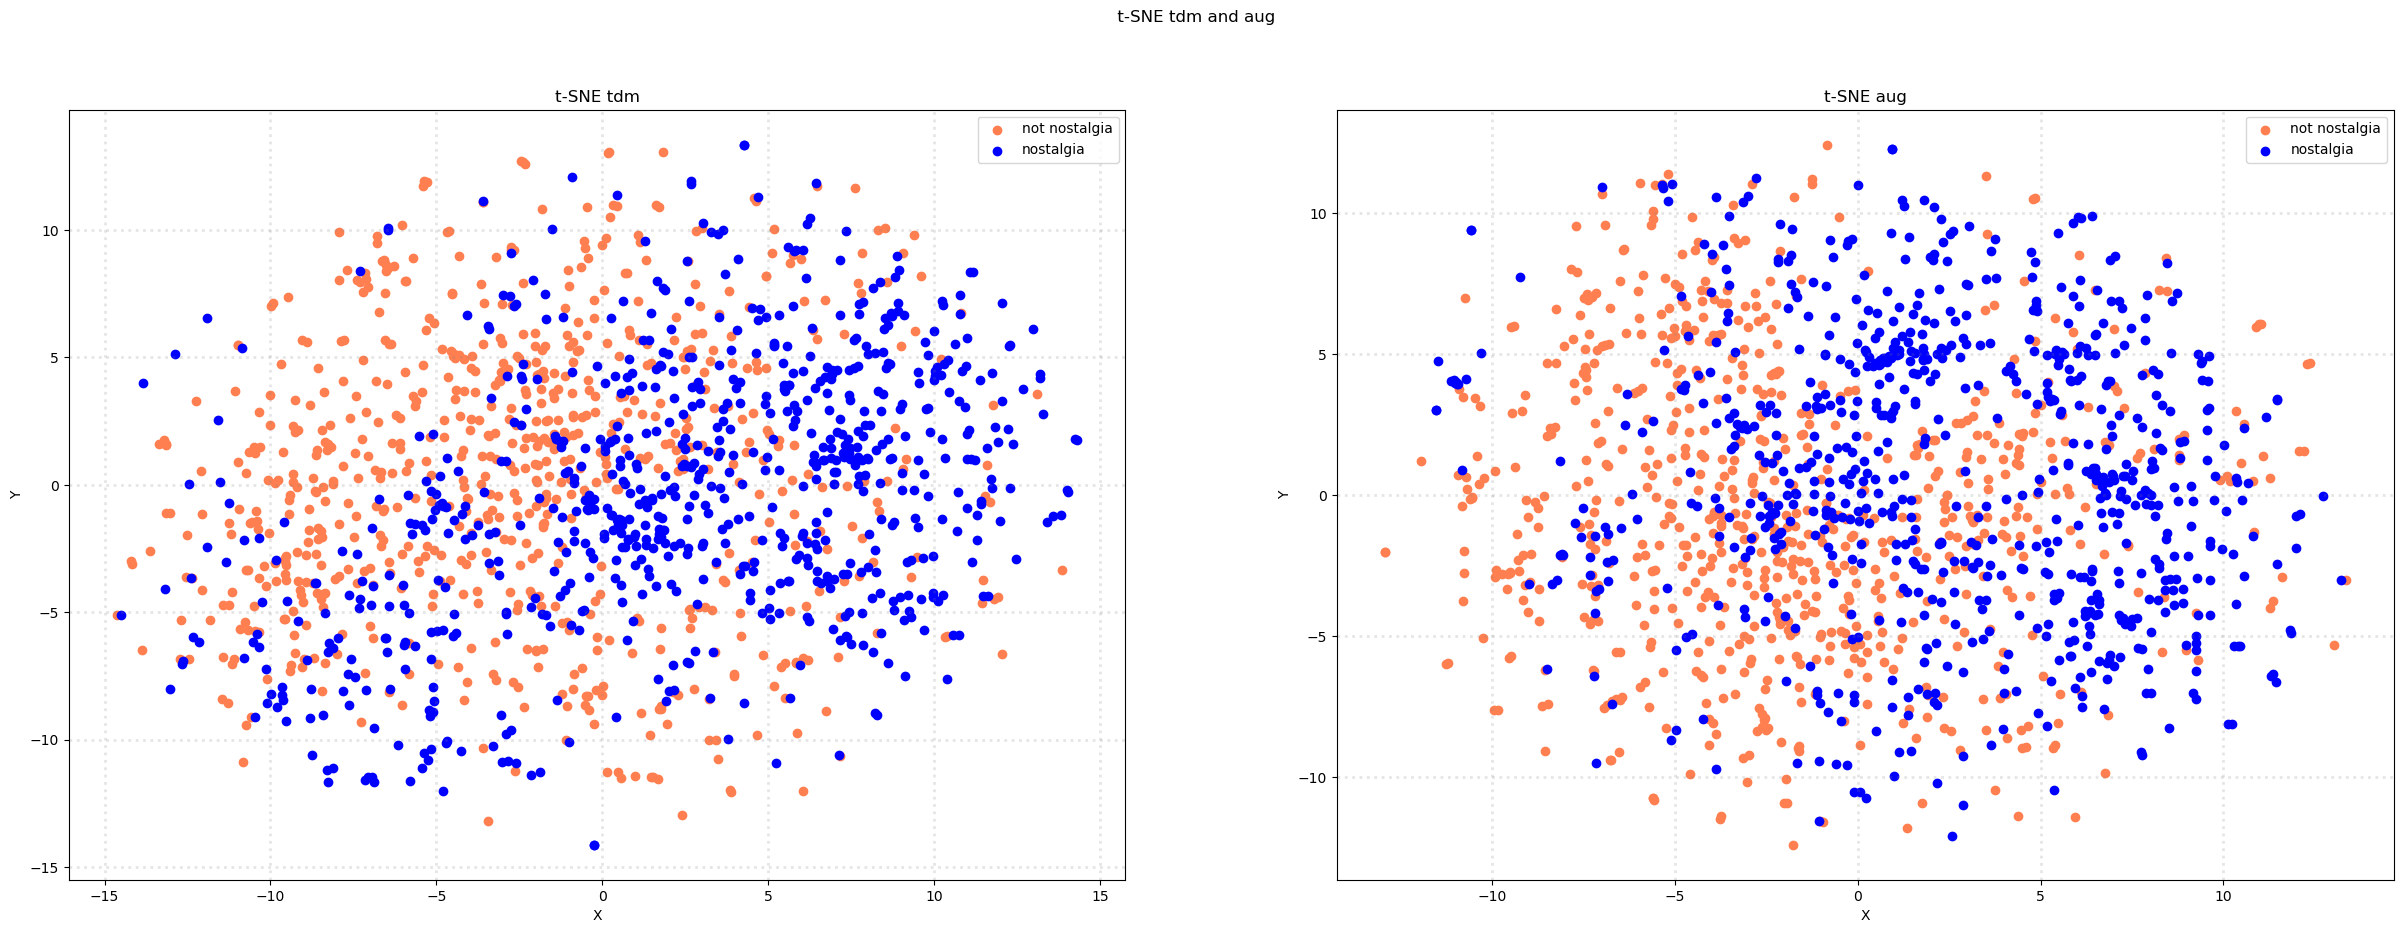

In [514]:
# Plot the results in subplots
col = ['coral', 'blue', ]
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 2, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle(' t-SNE tdm and aug')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_tsne_tdm, 't-SNE tdm')
plot_scatter(axes[1], X_tsne_aug, 't-SNE aug')

plt.show()

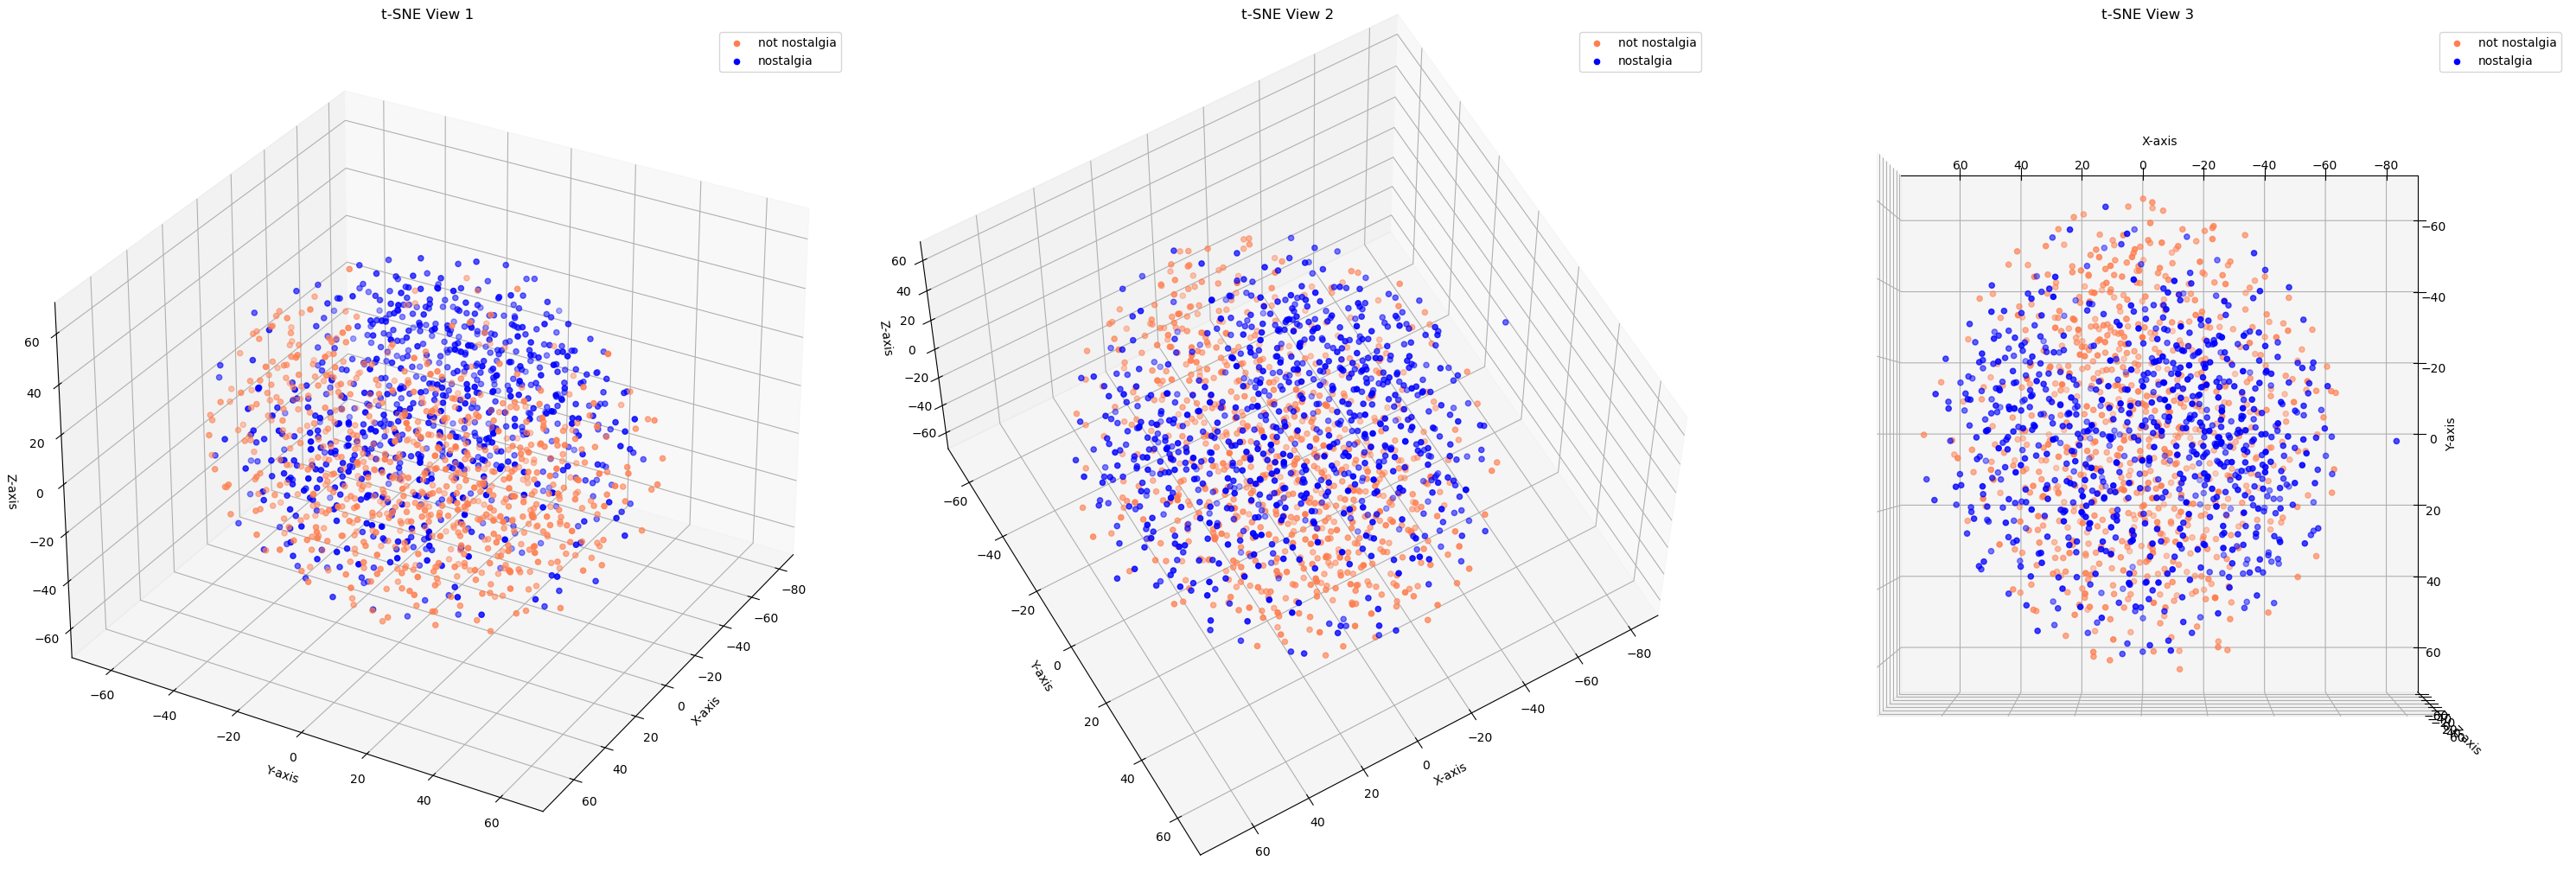

In [515]:
# Answer here
X_tsne_aug = TSNE(n_components=3,random_state=42).fit_transform(augmented_df.values)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']
categories = X['sentiment'].unique()


# Function to create a 3D scatter plot for t-SNE
def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend(loc='upper right')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    
    ax.view_init(elev=elev, azim=azim)  # Set elevation and azimuth

# Create the figure
fig = plt.figure(figsize=(30, 10))

# Define the angles for each subplot
angles = [(30, 30), (60, 60), (90, 90)]  # (elev, azim)
titles = ['t-SNE View 1', 't-SNE View 2', 't-SNE View 3']

# Create subplots
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    plot_3d_scatter(ax, X_tsne_aug, titles[i], elev, azim)

plt.tight_layout()
plt.show()

### Discretization and Binarization

In [516]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [517]:
X['bin_category'] = mlb.transform(X['sentiment']).tolist()

In [518]:
X['bin_category']

0       [1]
1       [0]
2       [0]
3       [1]
4       [0]
       ... 
1495    [1]
1496    [1]
1497    [1]
1498    [0]
1499    [0]
Name: bin_category, Length: 1500, dtype: object

### Data Exploration

In [519]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [520]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [521]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [522]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [523]:
X

,sentiment,comment,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,"[singer, golden, voice, love, hear, time, grea...","{of, golden, can, to, at, many, those, have, b...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[mist, beautiful, voice, ever, listened, kid, ...","{of, an, to, mist, angel, him, love, forgotten...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[mr., reeves, songs, always, love, smooth, voi...","{grow, is., of, but, to, at, simple, Always, s...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, 1st, tour, viet, nam, convinc...","{of, can, hope, to, Lou., me"", 47, later, have...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, songs, reminds, mum, played, every...","{him, of, to, me, who, mum, everyday, songs, h...",[0]
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[n't, know, .., opening, video, .., seeing, .....","{know!..but, of, speaks, him,..would, got, tha...",[1]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"['s, sad, beautiful, song, love, someone, afra...","{afraid, to, it's, song, such, him, is, your, ...",[1]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[dear, friend, think, age, time, important, co...","{Dear, to, glad, music., think, is, that, this...",[1]
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[born, 1954, started, aware, popular, music, g...","{of, to, at, many, emulate, or, aware, have, b...",[0]


### TF-IDF and Naive bayes(GaussianNB and MultinomialNB)

In [524]:
X['category'] = np.where(X['sentiment'] == 'nostalgia', 0, 1)


In [525]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [526]:
target_names

['nostalgia', 'not nostalgia']

In [527]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [528]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.85       225
not nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



### New Data Visualization(Word Cloud)

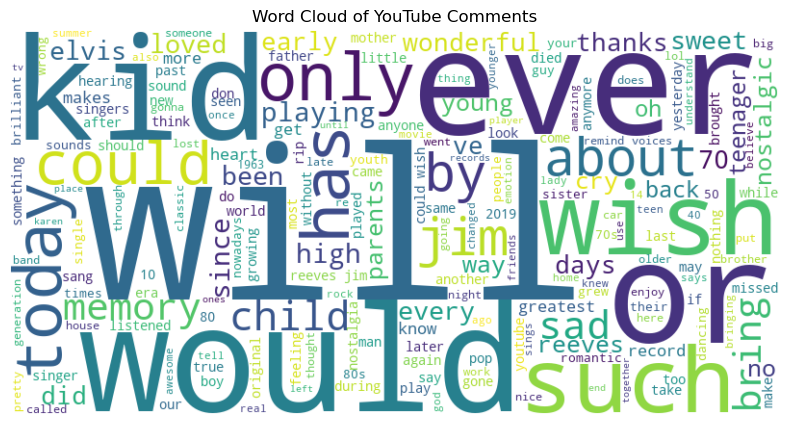

In [529]:
#This is the wordcloud of the word frequency larger than 9

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all comments into one text for generating the word cloud
word_support_dict = dict(zip(final_pattern_df['Patterns'], final_pattern_df['Support']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_support_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of YouTube Comments")
plt.show()


In [530]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")


In [531]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
tfidf_df


,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment'])

# Convert TF-IDF matrix to an array (GaussianNB requires dense input)
gnb_tfidf = tfidf_matrix.toarray()
y = df['sentiment']  # Assuming 'sentiment' is the target column in your dataframe

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(gnb_tfidf, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.67
Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.63      0.82      0.71       225
not nostalgia       0.74      0.52      0.61       225

     accuracy                           0.67       450
    macro avg       0.69      0.67      0.66       450
 weighted avg       0.69      0.67      0.66       450

